# Aggregate probability of antibiotic prescribing stratified by predicted risk level

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
from contextlib import redirect_stdout
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## 0- functions and read data

In [2]:
# def process_infection_data(data_infection, infection_name):
#     # add variables for incdt, prevl, no_abs, abs
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 0)), 'no_ab_incdt'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 0)), 'ab_incdt'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 1)), 'no_ab_prevl'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 1)), 'ab_prevl'] = 1

#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 0) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 0) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_ab_incdt'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == True) & (data_infection['incdt_'+infection_name+'_date'] == 1) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
#     data_infection.loc[((data_infection[infection_name+'_ab_date'].isnull() == False) & (data_infection['incdt_'+infection_name+'_date'] == 1) & (data_infection['event_'+infection_name+'_admitted'] == 1)), 'hosp_ab_prevl'] = 1

#     data_infection['infection'] = infection_name
#     data_infection['event_admitted'] = data_infection['event_'+infection_name+'_admitted']
#     data_infection = data_infection[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]
    
#     return data_infection

In [3]:
# def create_lineplot(y, var, title, ylabel, ax1):
#     sns.lineplot(x='date', y=y, 
#             hue=var, 
#             data=data_groupby_date_infectoion,
#             markers=True,
#             ax=ax1)
#     ax1.set_title(title)
#     ax1.set_ylabel(ylabel)
#     ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
#     ax1.axvline(x="2020-01", color='black', ls='--', lw=1.5)
#     ax1.axvline(x="2020-04", color='black', ls='--', lw=1.5)
#     ax1.axvline(x="2021-04", color='black', ls='--', lw=1.5)
# #     ax1.legend([],[], frameon=False)

In [4]:
# def round_five_mul(x, base=5):
#     return base * round(x/base)

In [63]:
# # #transfer data from other notebooks
# data_lrti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_lrti/prob_pred_groupby_bin_lrti_incdt.csv')
# data_lrti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_lrti/prob_pred_groupby_bin_lrti_prevl.csv')
# data_urti_combined_incdt = pd.read_csv(f'../output/hospitalisation_prediction_urti_combined/prob_pred_groupby_bin_urti_combined_incdt.csv')
# data_urti_combined_prevl = pd.read_csv(f'../output/hospitalisation_prediction_urti_combined/prob_pred_groupby_bin_urti_combined_prevl.csv')
data_uti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_uti/prob_pred_groupby_bin_uti_incdt.csv')
data_uti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_uti/prob_pred_groupby_bin_uti_prevl.csv')
# data_sinusitis_incdt = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/prob_pred_groupby_bin_sinusitis_incdt.csv')
# data_sinusitis_prevl = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/prob_pred_groupby_bin_sinusitis_prevl.csv')
# data_otmedia_incdt = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/prob_pred_groupby_bin_otmedia_incdt.csv')
# data_otmedia_prevl = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/prob_pred_groupby_bin_otmedia_prevl.csv')
# data_ot_externa_incdt = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/prob_pred_groupby_bin_ot_externa_incdt.csv')
# data_ot_externa_prevl = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/prob_pred_groupby_bin_ot_externa_prevl.csv')
# data_urti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_urti/prob_pred_groupby_bin_urti_incdt.csv')
# data_urti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_urti/prob_pred_groupby_bin_urti_prevl.csv')
# data_cough_incdt = pd.read_csv(f'../output/hospitalisation_prediction_cough/prob_pred_groupby_bin_cough_incdt.csv')
# data_cough_prevl = pd.read_csv(f'../output/hospitalisation_prediction_cough/prob_pred_groupby_bin_cough_prevl.csv')
data_cough_cold_incdt = pd.read_csv(f'../output/hospitalisation_prediction_cough_cold/prob_pred_groupby_bin_cough_cold_incdt.csv')
data_cough_cold_prevl = pd.read_csv(f'../output/hospitalisation_prediction_cough_cold/prob_pred_groupby_bin_cough_cold_prevl.csv')
# data_throat_incdt = pd.read_csv(f'../output/hospitalisation_prediction_throat/prob_pred_groupby_bin_throat_incdt.csv')
# data_throat_prevl = pd.read_csv(f'../output/hospitalisation_prediction_throat/prob_pred_groupby_bin_throat_prevl.csv')

# data_lrti_incdt['infection'] = 'lrti_incdt'
# data_lrti_prevl['infection'] = 'lrti_prevl'
# data_urti_combined_incdt['infection'] = 'urti_combined_incdt'
# data_urti_combined_prevl['infection'] = 'urti_combined_prevl'
data_uti_incdt['infection'] = 'uti_incdt'
data_uti_prevl['infection'] = 'uti_prevl'
# data_sinusitis_incdt['infection'] = 'sinusitis_incdt'
# data_sinusitis_prevl['infection'] = 'sinusitis_prevl'

# data_urti_incdt['infection'] = 'urti_incdt'
# data_urti_prevl['infection'] = 'urti_prevl'

data_cough_cold_incdt['infection'] = 'cough_cold_incdt'
data_cough_cold_prevl['infection'] = 'cough_cold_prevl'

In [67]:
data_uti_incdt['decile'] = data_uti_incdt.index + 1
data_uti_prevl['decile'] = data_uti_prevl.index + 1

In [68]:
#combine all data together
data = data_uti_incdt.append([data_uti_prevl], ignore_index=True)
data

,pred_mean_train,ab_prob_mean_train,pred_mean_test,ab_prob_mean_test,infection,decile
0,0.005947,0.072347,0.005961,0.072824,uti_incdt,1
1,0.006616,0.080540,0.006627,0.088498,uti_incdt,2
2,0.007012,0.084653,0.007014,0.091655,uti_incdt,3
3,0.007343,0.091077,0.007345,0.095732,uti_incdt,4
4,0.007654,0.095498,0.007664,0.093079,uti_incdt,5
5,0.007975,0.097669,0.007990,0.100338,uti_incdt,6
6,0.008323,0.106841,0.008341,0.105619,uti_incdt,7
7,0.008735,0.113013,0.008744,0.113845,uti_incdt,8
8,0.009298,0.118820,0.009295,0.118640,uti_incdt,9
9,0.010592,0.127492,0.010581,0.136484,uti_incdt,10


## 1- process and group-by data, and save them

In [32]:
data.pred_mean_train.max() + data.pred_mean_train.max()/3

0.025467984096608665

In [69]:
data

,pred_mean_train,ab_prob_mean_train,pred_mean_test,ab_prob_mean_test,infection,decile
0,0.005947,0.072347,0.005961,0.072824,uti_incdt,1
1,0.006616,0.080540,0.006627,0.088498,uti_incdt,2
2,0.007012,0.084653,0.007014,0.091655,uti_incdt,3
3,0.007343,0.091077,0.007345,0.095732,uti_incdt,4
4,0.007654,0.095498,0.007664,0.093079,uti_incdt,5
5,0.007975,0.097669,0.007990,0.100338,uti_incdt,6
6,0.008323,0.106841,0.008341,0.105619,uti_incdt,7
7,0.008735,0.113013,0.008744,0.113845,uti_incdt,8
8,0.009298,0.118820,0.009295,0.118640,uti_incdt,9
9,0.010592,0.127492,0.010581,0.136484,uti_incdt,10


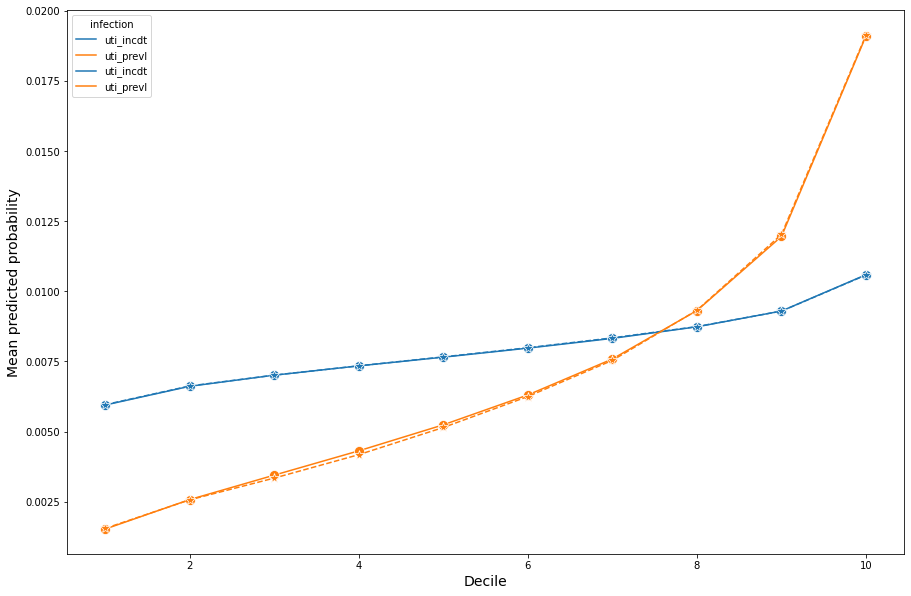

In [89]:
plt.figure(figsize=(15,10))

sns.lineplot(x='decile', y='pred_mean_train', data=data, hue='infection', marker='o', markersize=10, #markerfacecolor='limegreen', 
             )

g = sns.lineplot(x="decile", data=data, y="pred_mean_test",  hue="infection", marker='*', linestyle='--', markersize=10
                 )

# plt.plot(data.ab_prob_mean_train, data.pred_mean_train)
# plt.plot(data.ab_prob_mean_test, data.pred_mean_test, '--')

# plt.ylim(0, data.pred_mean_train.max() + data.pred_mean_train.max()/3)
# plt.xlim(0, data.ab_prob_mean_train.max() + data.ab_prob_mean_train.max()/3)
# plt.setp(g.collections, alpha=.5) #alpha for markers
# plt.setp(g.lines, alpha=.5) #alpha for line
# plt.xticks(rotation=90)
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean predicted probability', fontsize=14)
# plt.legend([],[], frameon=False)
# plt.savefig('../output/hosp_plots/hosp_count_nolegend.jpg')
plt.show()

In [4]:
# #process data of all infections
# data_uti = process_infection_data(data_uti, 'uti')
# data_urti_combined = process_infection_data(data_urti_combined, 'urti_combined')
# data_lrti = process_infection_data(data_lrti, 'lrti')
# data_sinusitis = process_infection_data(data_sinusitis, 'sinusitis')
# data_otmedia = process_infection_data(data_otmedia, 'otmedia')
# data_ot_externa = process_infection_data(data_ot_externa, 'ot_externa')
# data_urti = process_infection_data(data_urti, 'urti')
# data_cough = process_infection_data(data_cough, 'cough')
# data_cough_cold = process_infection_data(data_cough_cold, 'cough_cold')
# data_throat = process_infection_data(data_throat, 'throat')

In [39]:
#combine all data together
data = data_uti.append([data_urti_combined, data_lrti, data_sinusitis, data_otmedia, data_ot_externa, data_urti, data_cough, data_cough_cold, data_throat], ignore_index=True)

#groupby date and infection type
data_groupby_date_infectoion = data.groupby(['date', 'infection'], as_index=False).sum()

#drop any events equal or less than 5
data_groupby_date_infectoion = data_groupby_date_infectoion[data_groupby_date_infectoion.event_admitted > 5]

#calculate total infections and percentages of each hospitalisation
data_groupby_date_infectoion['total_cases'] = data_groupby_date_infectoion['no_ab_incdt'] + data_groupby_date_infectoion['ab_incdt'] + data_groupby_date_infectoion['no_ab_prevl'] + data_groupby_date_infectoion['ab_prevl']
data_groupby_date_infectoion['hosp_perc'] = (data_groupby_date_infectoion['event_admitted'] / data_groupby_date_infectoion['total_cases'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_incdt'] = (data_groupby_date_infectoion['hosp_no_ab_incdt'] / data_groupby_date_infectoion['no_ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_ab_incdt'] = (data_groupby_date_infectoion['hosp_ab_incdt'] / data_groupby_date_infectoion['ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_prevl'] = (data_groupby_date_infectoion['hosp_no_ab_prevl'] / data_groupby_date_infectoion['no_ab_prevl'])*100
data_groupby_date_infectoion['hosp_perc_ab_prevl'] = (data_groupby_date_infectoion['hosp_ab_prevl'] / data_groupby_date_infectoion['ab_prevl'])*100

#round count to make last digit either 0 or 5
data_groupby_date_infectoion['event_admitted'] = round_five_mul(data_groupby_date_infectoion['event_admitted'], base=5)

In [40]:
#save data
data_groupby_date_infectoion_date_event_inf = data_groupby_date_infectoion[['date',	'infection', 'event_admitted']]
data_groupby_date_infectoion_date_event_inf.to_csv('../output/hosp_plots/data_groupby_date_infectoion_date_event_inf.csv', index=False)

## 2- plot counts and percentages

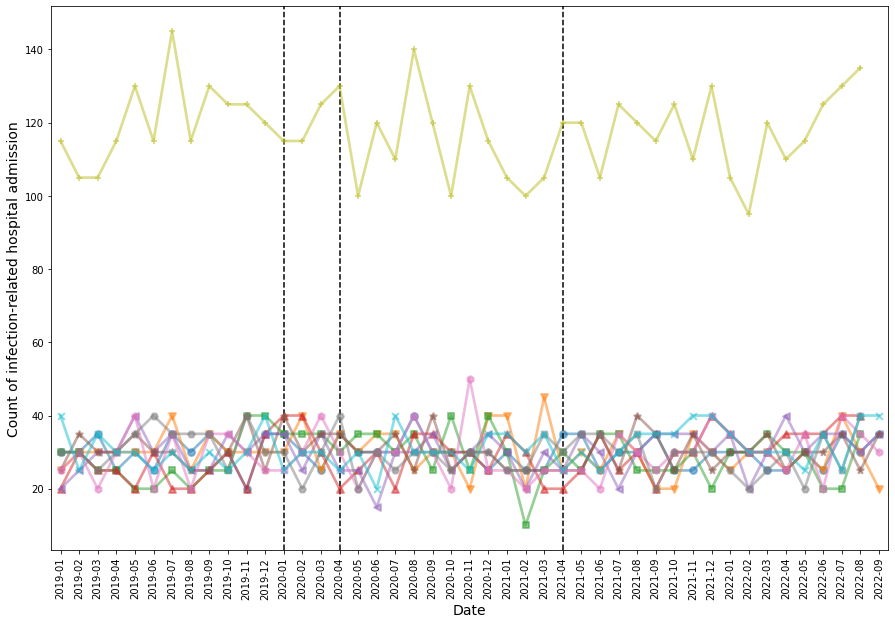

In [41]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="event_admitted", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-04"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of infection-related hospital admission', fontsize=14)
plt.legend([],[], frameon=False)
plt.savefig('../output/hosp_plots/hosp_count_nolegend.jpg')
plt.show()

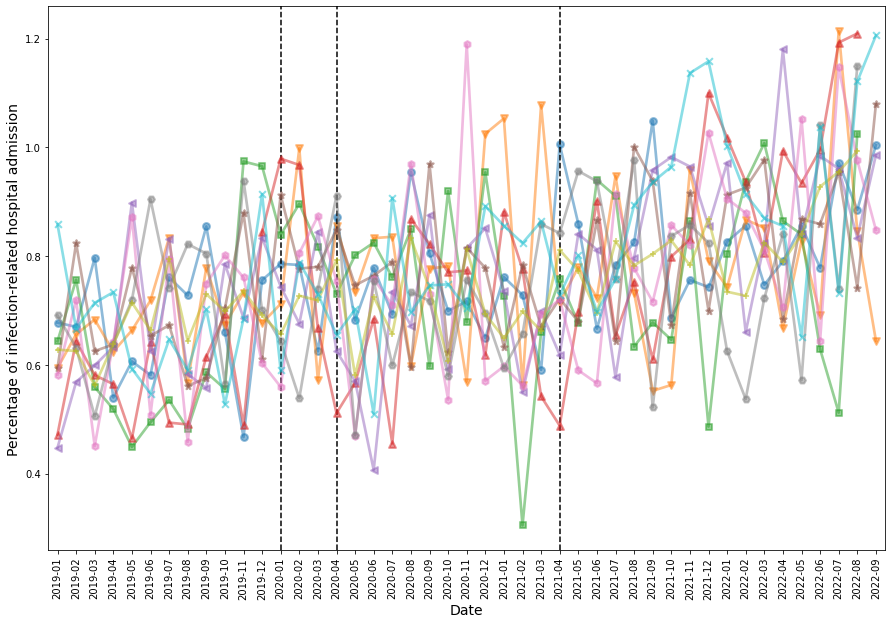

In [42]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="hosp_perc", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of infection-related hospital admission', fontsize=14)
plt.legend([],[], frameon=False)
plt.savefig('../output/hosp_plots/hosp_percentage_nolegend.jpg')
plt.show()

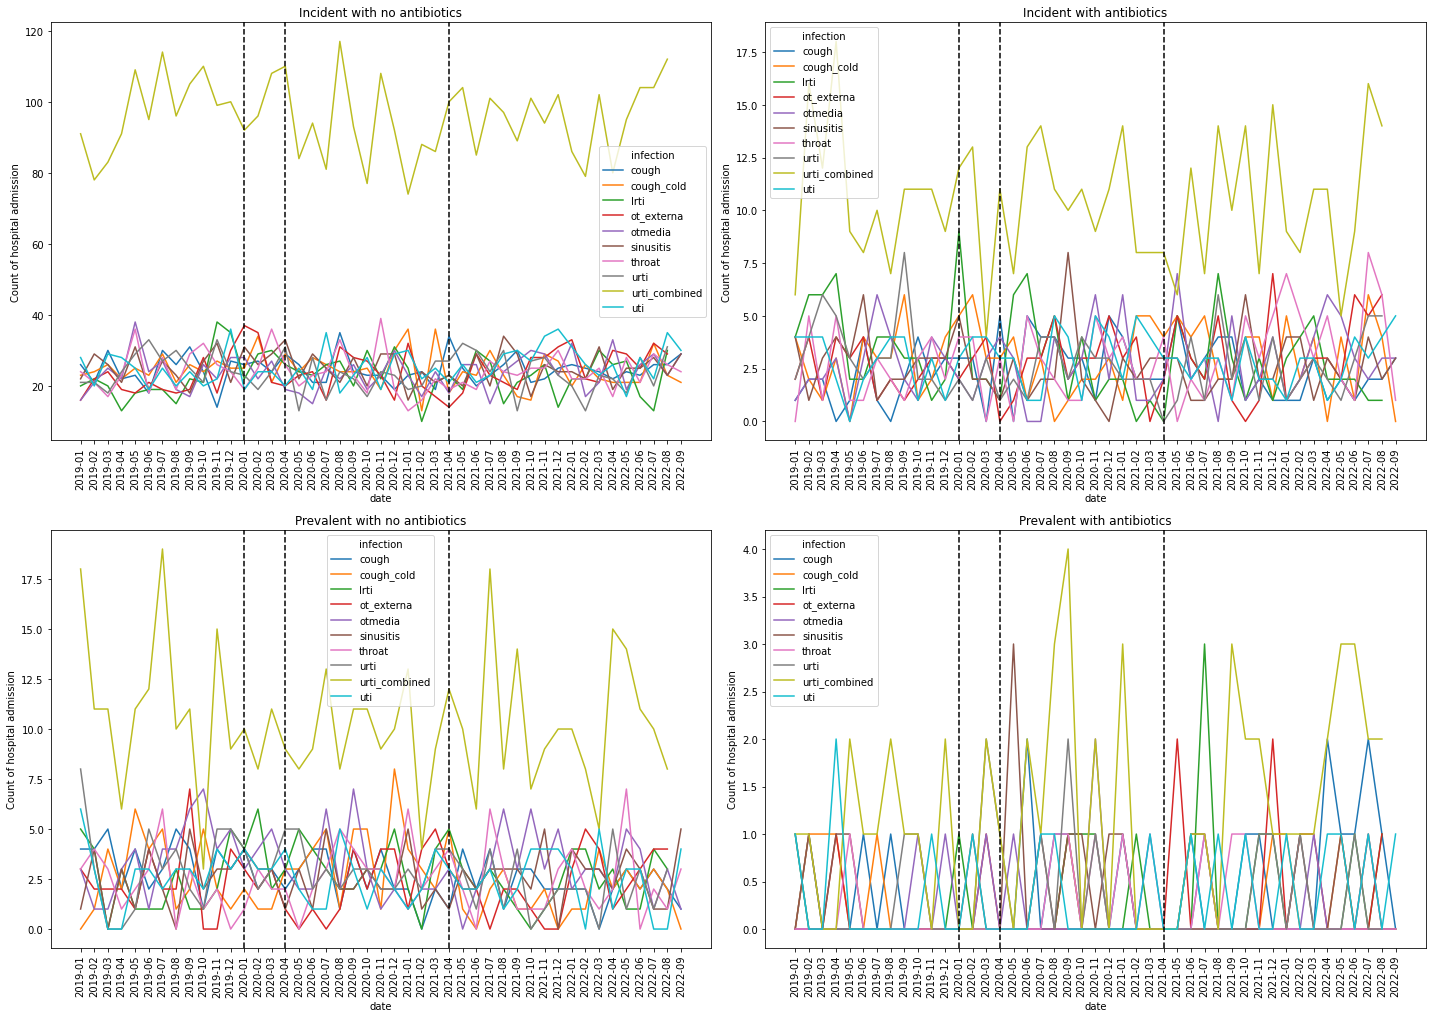

In [43]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Count of hospital admission', axes[0,0])
create_lineplot('hosp_ab_incdt', 'infection', 'Incident with antibiotics', 'Count of hospital admission', axes[0,1])
create_lineplot('hosp_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Count of hospital admission', axes[1,0])
create_lineplot('hosp_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Count of hospital admission', axes[1,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('../output/hosp_plots/hosp_count_incdt_prevl_noabs_abs.jpg')
plt.show()

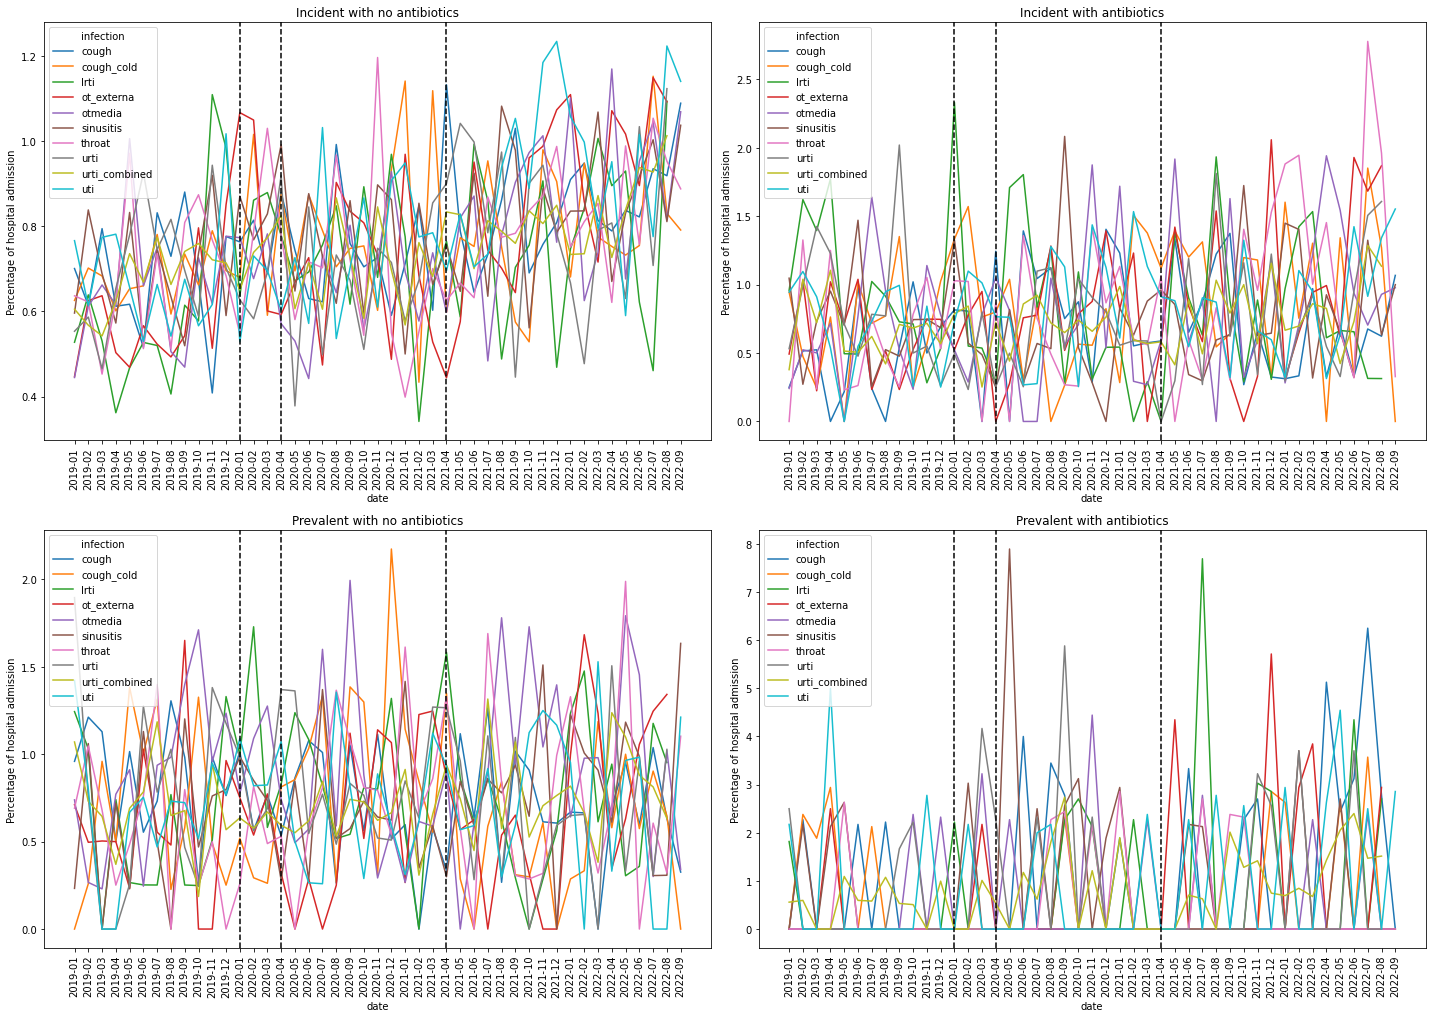

In [44]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_perc_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Percentage of hospital admission', axes[0,0])
create_lineplot('hosp_perc_ab_incdt', 'infection', 'Incident with antibiotics', 'Percentage of hospital admission', axes[0,1])
create_lineplot('hosp_perc_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Percentage of hospital admission', axes[1,0])
create_lineplot('hosp_perc_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Percentage of hospital admission', axes[1,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('../output/hosp_plots/hosp_percentage_incdt_prevl_noabs_abs.jpg')
plt.show()